<a href="https://colab.research.google.com/github/medha32/Linear-Regression-from-Scratch/blob/main/Forecasting_Sticker_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
train_path = '/content/train.csv'
test_path = '/content/test.csv'
pd.read_csv(train_path)
pd.read_csv(test_path)

,id,date,country,store,product
0,230130,2017-01-01,Canada,Discount Stickers,Holographic Goose
1,230131,2017-01-01,Canada,Discount Stickers,Kaggle
2,230132,2017-01-01,Canada,Discount Stickers,Kaggle Tiers
3,230133,2017-01-01,Canada,Discount Stickers,Kerneler
4,230134,2017-01-01,Canada,Discount Stickers,Kerneler Dark Mode
...,...,...,...,...,...
98545,328675,2019-12-31,Singapore,Premium Sticker Mart,Holographic Goose
98546,328676,2019-12-31,Singapore,Premium Sticker Mart,Kaggle
98547,328677,2019-12-31,Singapore,Premium Sticker Mart,Kaggle Tiers
98548,328678,2019-12-31,Singapore,Premium Sticker Mart,Kerneler


In [6]:
df = pd.read_csv(train_path)
df.head()

,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0


In [7]:
df.describe()

,id,num_sold
count,230130.000000,221259.000000
mean,115064.500000,752.527382
std,66432.953062,690.165445
min,0.000000,5.000000
25%,57532.250000,219.000000
50%,115064.500000,605.000000
75%,172596.750000,1114.000000
max,230129.000000,5939.000000


In [8]:
df.keys()

Index(['id', 'date', 'country', 'store', 'product', 'num_sold'], dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230130 entries, 0 to 230129
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   id        230130 non-null  int64  
 1   date      230130 non-null  object 
 2   country   230130 non-null  object 
 3   store     230130 non-null  object 
 4   product   230130 non-null  object 
 5   num_sold  221259 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 10.5+ MB


In [10]:
df.isnull()

,id,date,country,store,product,num_sold
0,False,False,False,False,False,True
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
230125,False,False,False,False,False,False
230126,False,False,False,False,False,False
230127,False,False,False,False,False,False
230128,False,False,False,False,False,False


Text(0, 0.5, 'num_sold')

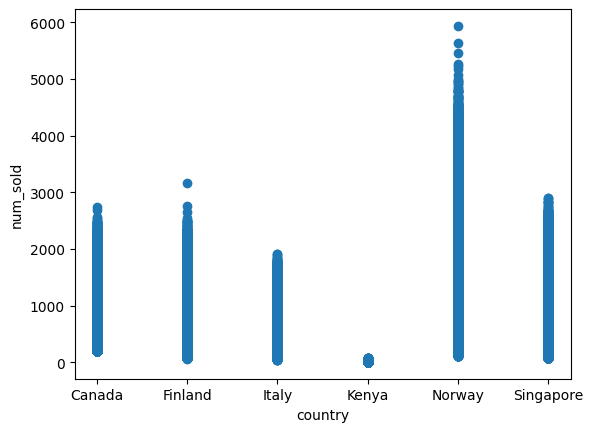

In [11]:
plt.scatter(df['country'], df['num_sold'])
plt.xlabel('country')
plt.ylabel('num_sold')

<ipython-input-12-73ab4af9b69b>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='country', y='num_sold', ci=None)


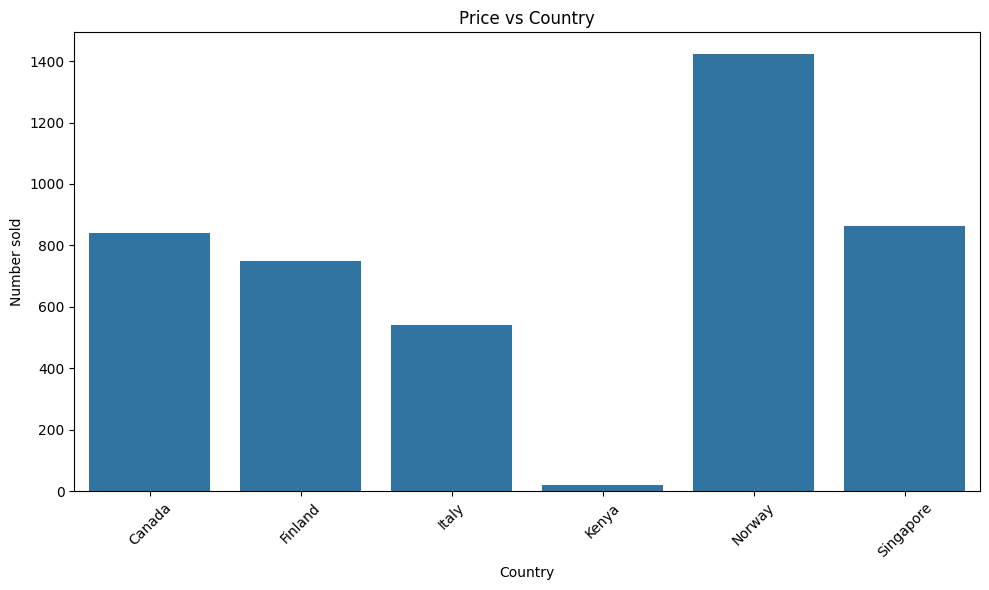

In [12]:
# Create a Seaborn bar plot of price vs country
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='country', y='num_sold', ci=None)
plt.title('Price vs Country')
plt.xticks(rotation=45)  # Rotate country names for better visibility
plt.xlabel('Country')
plt.ylabel('Number sold')
plt.tight_layout()
plt.show()

<ipython-input-13-c8d2e81d1234>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='country', y='num_sold', hue='month', data=df, ci=None)


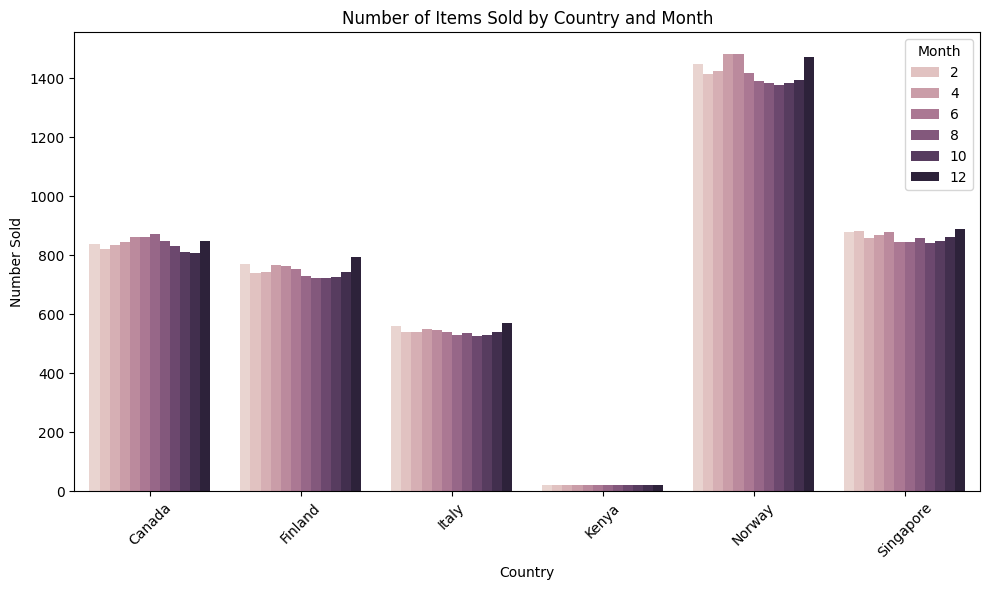

In [13]:
if 'date' in df.columns:
    df['month'] = pd.to_datetime(df['date']).dt.month

# Plot the data using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='country', y='num_sold', hue='month', data=df, ci=None)

# Customize the plot
plt.title('Number of Items Sold by Country and Month')
plt.xlabel('Country')
plt.ylabel('Number Sold')
plt.legend(title='Month', loc='upper right')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Sales by store')

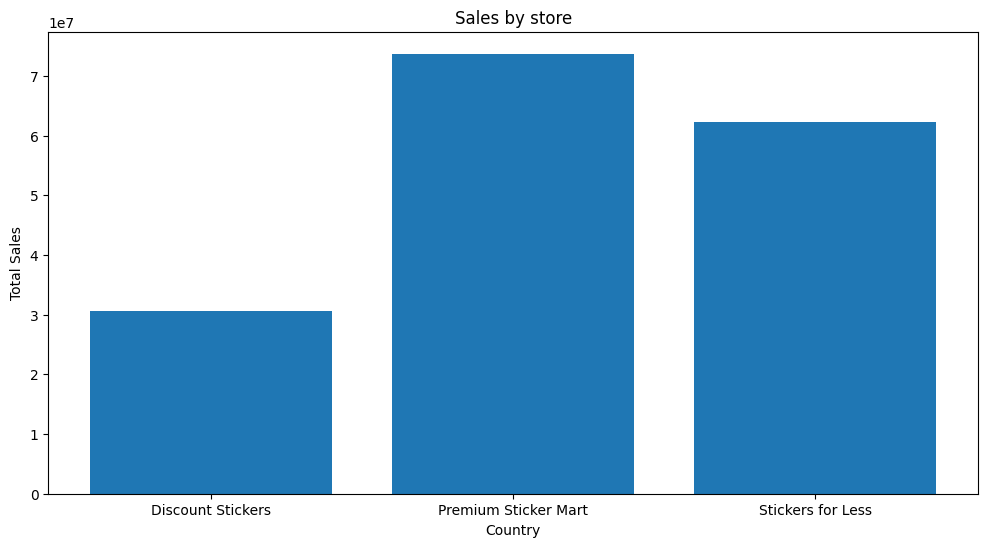

In [14]:
store_sales = df.groupby('store')['num_sold'].sum()
fig, ax = plt.subplots(figsize=(12, 6)) # Remove the '1' to get a single Axes object
ax.bar(store_sales.index,store_sales.values) # Use 'ax' directly
ax.set_xlabel('Country')
ax.set_ylabel('Total Sales')
ax.set_title('Sales by store')

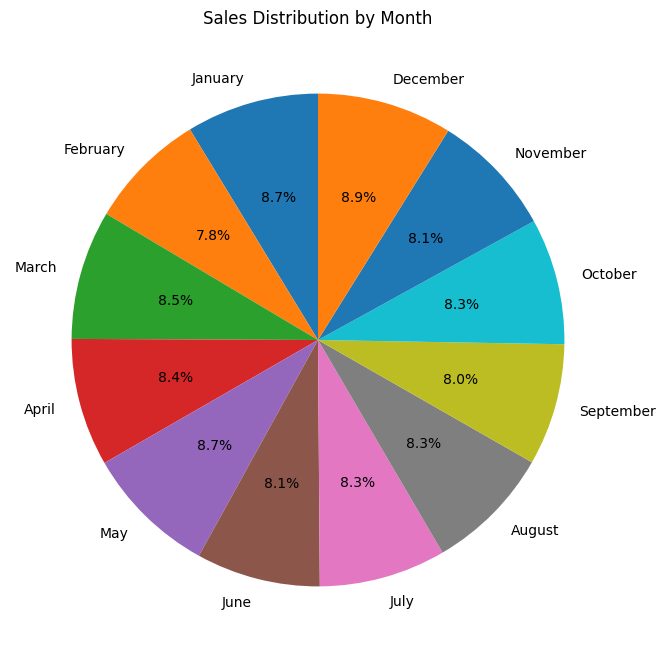

In [15]:
if 'month' not in df.columns:
    df['month'] = pd.to_datetime(df['date_column']).dt.month
monthly_sales = df.groupby('month')['num_sold'].sum()
month_labels = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']
plt.figure(figsize=(8, 8))
plt.pie(monthly_sales, labels=[month_labels[m-1] for m in monthly_sales.index],
        autopct='%1.1f%%', startangle=90)
plt.title('Sales Distribution by Month')
plt.show()

In [16]:
def data_processing(df):
    return df

train = data_processing(df)
test = data_processing(pd.read_csv(test_path))

In [17]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [25]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
def data_processing(df):

    categorical_features = ['country', 'store', 'product']
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    encoded_features = encoder.fit_transform(df[categorical_features])
    encoded_df = pd.DataFrame(encoded_features,
                              columns=encoder.get_feature_names_out(categorical_features))
    df = pd.concat([df, encoded_df], axis=1)

    df = df.drop(categorical_features, axis=1)

    return df
train_path = '/content/train.csv'
test_path = '/content/test.csv'
train = data_processing(pd.read_csv(train_path))
test = data_processing(pd.read_csv(test_path))
print("Train Data Columns:", train.columns)
print("Test Data Columns:", test.columns)

target_col = 'num_sold'
features = [col for col in train.columns if col != target_col and col != 'date']

train['year'] = pd.to_datetime(train['date']).dt.year
train['month'] = pd.to_datetime(train['date']).dt.month
train['day'] = pd.to_datetime(train['date']).dt.day

test['year'] = pd.to_datetime(test['date']).dt.year
test['month'] = pd.to_datetime(test['date']).dt.month
test['day'] = pd.to_datetime(test['date']).dt.day

features.extend(['year', 'month', 'day'])

X = train[features]
y = train[target_col]
X_test = test[features]

# ----> Drop rows with NaN in the target variable (y) <----
train = train.dropna(subset=[target_col])
X = train[features]
y = train[target_col]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_val)
mse_linear = mean_squared_error(y_val, y_pred_linear)
print(f"Linear Regression MSE: {mse_linear}")
test_preds_linear = linear_model.predict(X_test)

Train Data Columns: Index(['id', 'date', 'num_sold', 'country_Canada', 'country_Finland',
       'country_Italy', 'country_Kenya', 'country_Norway', 'country_Singapore',
       'store_Discount Stickers', 'store_Premium Sticker Mart',
       'store_Stickers for Less', 'product_Holographic Goose',
       'product_Kaggle', 'product_Kaggle Tiers', 'product_Kerneler',
       'product_Kerneler Dark Mode'],
      dtype='object')
Test Data Columns: Index(['id', 'date', 'country_Canada', 'country_Finland', 'country_Italy',
       'country_Kenya', 'country_Norway', 'country_Singapore',
       'store_Discount Stickers', 'store_Premium Sticker Mart',
       'store_Stickers for Less', 'product_Holographic Goose',
       'product_Kaggle', 'product_Kaggle Tiers', 'product_Kerneler',
       'product_Kerneler Dark Mode'],
      dtype='object')
Linear Regression MSE: 100249.18829535588


In [20]:
sample_submission_path = '/content/sample_submission.csv'
sample_submission = pd.read_csv(sample_submission_path)
submission = sample_submission.copy()
submission['num_sold'] = test_preds_linear
submission.to_csv('submission.csv', index=False)
print("Submission saved as submission.csv")

Submission saved as submission.csv


In [21]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_val)
mse_rf = mean_squared_error(y_val, y_pred_rf)
print(f"Random Forest MSE: {mse_rf}")
test_preds_rf = rf_model.predict(X_test)

Random Forest MSE: 11401.341402607792


In [22]:
submission['num_sold'] = test_preds_rf

submission.to_csv('submission1.csv', index=False)
print("Submission saved as submission1.csv")

Submission saved as submission1.csv


In [26]:
!pip install xgboost

from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_val)
mse_xgb = mean_squared_error(y_val, y_pred_xgb)
print(f"XGBoost MSE: {mse_xgb}")

test_preds_xgb = xgb_model.predict(X_test)
submission['num_sold'] = test_preds_xgb

submission.to_csv('submission2.csv', index=False)
print("Submission saved as submission2.csv")

XGBoost MSE: 10897.931027768522
Submission saved as submission2.csv


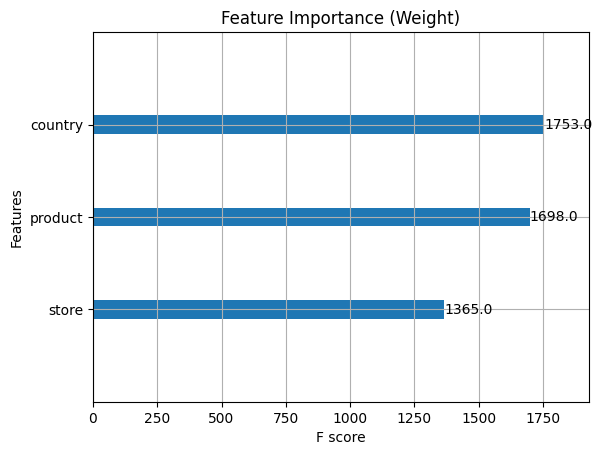

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import matplotlib.pyplot as plt
import pandas as pd

train_data = pd.read_csv(train_path)

train_data_cleaned = train_data.drop(columns=["id", "date"])

imputer = SimpleImputer(strategy="mean")
train_data_cleaned["num_sold"] = imputer.fit_transform(train_data_cleaned[["num_sold"]])

categorical_cols = ["country", "store", "product"]
label_encoders = {}
for col in categorical_cols:
    encoder = LabelEncoder()
    train_data_cleaned[col] = encoder.fit_transform(train_data_cleaned[col])
    label_encoders[col] = encoder

X = train_data_cleaned.drop(columns=["num_sold"])
y = train_data_cleaned["num_sold"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

xgb.plot_importance(xgb_model, importance_type="weight", title="Feature Importance (Weight)")
plt.show()